# 실습1

In [10]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [11]:
x_train = pd.DataFrame(['m','w','m','w','m','w'],columns = ['sex'])
x_train

,sex
0,m
1,w
2,m
3,w
4,m
5,w


In [12]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     6 non-null      object
dtypes: object(1)
memory usage: 176.0+ bytes


In [13]:
x_train['sex'].value_counts()

m    3
w    3
Name: sex, dtype: int64

In [14]:
encoding = LabelEncoder()
encoding.fit(x_train['sex'])
x_train["sex_encoding"] = encoding.transform(x_train['sex'])


In [15]:
x_train

,sex,sex_encoding
0,m,0
1,w,1
2,m,0
3,w,1
4,m,0
5,w,1


In [16]:
one_encoding = OneHotEncoder(sparse=False)
one_encoding.fit(x_train[['sex']])
one_encoding.transform(x_train[['sex']])

print(one_encoding.get_feature_names())

['x0_m' 'x0_w']


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [17]:
x_train_one = pd.DataFrame(one_encoding.transform(x_train[['sex']]),columns=['sex0','sex1'] )

In [18]:
x_train = pd.concat([x_train,x_train_one],axis = 1)

In [19]:
x_train.head()

,sex,sex_encoding,sex0,sex1
0,m,0,1.0,0.0
1,w,1,0.0,1.0
2,m,0,1.0,0.0
3,w,1,0.0,1.0
4,m,0,1.0,0.0


In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
corpus = [
            '청년 인재 개발 양성 과정',
            '인공지능 청년 양성',
            '미래 인공지능 데이터 대한민국',
            '데이터 원유 기술사 청년 개발'
            
        ]
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [22]:
count_vect = CountVectorizer()

In [23]:
count_vect.fit(corpus)

CountVectorizer()

In [24]:
count_vect.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [25]:
count_vect.transform(corpus).toarray()

array([[1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0],
       [1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1]], dtype=int64)

In [26]:
features = count_vect.transform(corpus)

In [27]:
features

<4x11 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [28]:
vocab = count_vect.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [29]:
vocab

['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [30]:
DTM = pd.DataFrame(features.toarray(), columns = vocab)

In [31]:
DTM

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,1,1,0,0,0,0,1,0,0,1,1
1,0,0,0,0,0,0,1,0,1,0,1
2,0,0,0,1,1,1,0,0,1,0,0
3,1,0,1,0,1,0,0,1,0,0,1


In [32]:
count_vect.transform(['기술사 대한민국 인재 만세']).toarray()

array([[0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0]], dtype=int64)

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
corpus

['청년 인재 개발 양성 과정', '인공지능 청년 양성', '미래 인공지능 데이터 대한민국', '데이터 원유 기술사 청년 개발']

In [35]:
tfid = TfidfVectorizer()

tfid.fit(corpus)

tfid.vocabulary_

{'청년': 10,
 '인재': 9,
 '개발': 0,
 '양성': 6,
 '과정': 1,
 '인공지능': 8,
 '미래': 5,
 '데이터': 4,
 '대한민국': 3,
 '원유': 7,
 '기술사': 2}

In [36]:
tfid.transform(corpus).toarray()

array([[0.41263976, 0.52338122, 0.        , 0.        , 0.        ,
        0.        , 0.41263976, 0.        , 0.        , 0.52338122,
        0.33406745],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.61366674, 0.        , 0.61366674, 0.        ,
        0.49681612],
       [0.        , 0.        , 0.        , 0.55528266, 0.43779123,
        0.55528266, 0.        , 0.        , 0.43779123, 0.        ,
        0.        ],
       [0.41263976, 0.        , 0.52338122, 0.        , 0.41263976,
        0.        , 0.        , 0.52338122, 0.        , 0.        ,
        0.33406745]])

In [37]:
features_idf = tfid.transform(corpus)

In [38]:
features_idf

<4x11 sparse matrix of type '<class 'numpy.float64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [39]:
vocab_idf = count_vect.get_feature_names()
vocab_idf

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['개발', '과정', '기술사', '대한민국', '데이터', '미래', '양성', '원유', '인공지능', '인재', '청년']

In [40]:
DTM_idf = pd.DataFrame(features_idf.toarray(),columns = vocab_idf).head()

In [46]:
DTM_idf

,개발,과정,기술사,대한민국,데이터,미래,양성,원유,인공지능,인재,청년
0,0.41264,0.523381,0.000000,0.000000,0.000000,0.000000,0.412640,0.000000,0.000000,0.523381,0.334067
1,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.613667,0.000000,0.613667,0.000000,0.496816
2,0.00000,0.000000,0.000000,0.555283,0.437791,0.555283,0.000000,0.000000,0.437791,0.000000,0.000000
3,0.41264,0.000000,0.523381,0.000000,0.412640,0.000000,0.000000,0.523381,0.000000,0.000000,0.334067


# 실습2

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font= font_family, rc = {"axes.unicode_minus" : False})

from sklearn.impute import SimpleImputer

from sklearn import linear_model

In [54]:
temp_dict = {'A열' : [np.nan, 4, 6, 5, 5 , np.nan],
             'B열' : ['a', 'a', np.nan, 'b', 'b', 'b'],
             'C열' : [np.nan, 3.5, -1.5, np.nan, 5.5, np.nan],
             'D열' : [1,0,1,0,1,1]}
temp_dict

missing_data = pd.DataFrame(temp_dict)
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [55]:
missing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A열      4 non-null      float64
 1   B열      5 non-null      object 
 2   C열      3 non-null      float64
 3   D열      6 non-null      int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 320.0+ bytes


In [58]:
missing_data.isnull()
missing_data.isnull().sum()


A열    2
B열    1
C열    3
D열    0
dtype: int64

In [62]:
print(missing_data['A열'].isnull().sum())
print(missing_data['B열'].isnull().sum())
print(missing_data['C열'].isnull().sum())
print(missing_data['D열'].isnull().sum())

2
1
3
0


<AxesSubplot:>

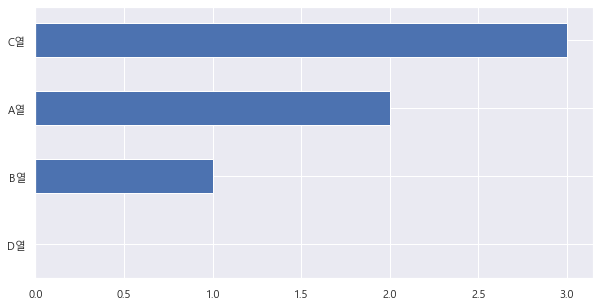

In [66]:
missing_data.isnull().sum().sort_values().plot.barh(figsize = (10,5))

In [71]:
missing_data.dropna(axis = 0)

,A열,B열,C열,D열
1,4.0,a,3.5,0
4,5.0,b,5.5,1


In [72]:
missing_data.dropna(axis = 1)

,D열
0,1
1,0
2,1
3,0
4,1
5,1


In [74]:
missing_data.dropna(thresh = 5, axis =1 ) #결측값 제외 후 5개 미만인 열은 a,c열

,B열,D열
0,a,1
1,a,0
2,NaN,1
3,b,0
4,b,1
5,b,1


In [77]:
missing_data[missing_data['B열'].notnull()] #특정 열을 대상으로 결측값이 존재하는 raw 제거

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [78]:
missing_data

,A열,B열,C열,D열
0,NaN,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,NaN,b,NaN,1


In [82]:
missing_data['A열'].fillna(0) #0으로 채우기
#missing_data['A열'] = missing_data['A열'].fillna(0)

0    0.0
1    4.0
2    6.0
3    5.0
4    5.0
5    0.0
Name: A열, dtype: float64

In [86]:
missing_data['B열'].fillna(method = 'ffill') #이전 값으로 채우기

0    a
1    a
2    a
3    b
4    b
5    b
Name: B열, dtype: object

In [87]:
missing_data['C열'].fillna(method = 'bfill') # 이후 값으로 채우기

0    3.5
1    3.5
2   -1.5
3    5.5
4    5.5
5    NaN
Name: C열, dtype: float64

In [91]:
missing_data.fillna(missing_data.mean()) #속성별 평균으로 대체
# missing_data.where(pd.notnull(missing_data),missing_data.min(),axis = 'columns')

C:\Users\user\AppData\Local\Temp\ipykernel_6796\3758859993.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  missing_data.fillna(missing_data.mean()) #속성별 평균으로 대체


,A열,B열,C열,D열
0,5.0,a,2.5,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,2.5,0
4,5.0,b,5.5,1
5,5.0,b,2.5,1


In [93]:
df = missing_data.copy()  #missing_data copy

imputer = SimpleImputer(strategy='most_frequent') #most_frequent 최빈값, mean 평균값, median : 중앙값

df['A열'] = imputer.fit_transform(missing_data[['A열']])


In [94]:
df

,A열,B열,C열,D열
0,5.0,a,NaN,1
1,4.0,a,3.5,0
2,6.0,NaN,-1.5,1
3,5.0,b,NaN,0
4,5.0,b,5.5,1
5,5.0,b,NaN,1


In [95]:
df = pd.DataFrame(imputer.fit_transform(df), columns= df.columns)

In [96]:
df

,A열,B열,C열,D열
0,5.0,a,-1.5,1
1,4.0,a,3.5,0
2,6.0,b,-1.5,1
3,5.0,b,-1.5,0
4,5.0,b,5.5,1
5,5.0,b,-1.5,1


In [101]:
data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data",
                  header = None,
                  names = ['sex','length','diameter','height',
                              'whole_weight', 'shucked_weight',
                              'viscera_weight', 'shell_weight', 'rings'])

In [104]:
df_missing = data.copy()[:10]
df_missing

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [107]:
df_missing.loc[0:4,'whole_weight'] = np.nan

In [126]:
df_missing.head(10)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,NaN,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,NaN,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,NaN,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,NaN,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.7680,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.8945,0.3145,0.1510,0.320,19


In [121]:
X = df_missing.dropna(axis = 0)[['diameter','height','shell_weight']]
Y = df_missing.dropna(axis = 0)['whole_weight']

In [122]:
X.head()

,diameter,height,shell_weight
5,0.300,0.095,0.120
6,0.415,0.150,0.330
7,0.425,0.125,0.260
8,0.370,0.125,0.165
9,0.440,0.150,0.320


In [124]:
Y.head()

5    0.3515
6    0.7775
7    0.7680
8    0.5095
9    0.8945
Name: whole_weight, dtype: float64

In [129]:
lin_reg = linear_model.LinearRegression() #선형회귀 모델 생성
lin_reg_model = lin_reg.fit(X,Y) #선형회귀 모형 구성
y_pred = lin_reg_model.predict(df_missing.loc[:, ['diameter', 'height','shell_weight']])
y_pred

array([0.54255501, 0.19525768, 0.68750758, 0.49522097, 0.16848482,
       0.33954241, 0.80376583, 0.78298276, 0.52082394, 0.85388506])

In [132]:
df_missing['whole_weight'].fillna(pd.Series(y_pred.flatten()),inplace = True)

df_missing

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.542555,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.195258,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.687508,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.495221,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.168485,0.0895,0.0395,0.055,7
5,I,0.425,0.300,0.095,0.351500,0.1410,0.0775,0.120,8
6,F,0.530,0.415,0.150,0.777500,0.2370,0.1415,0.330,20
7,F,0.545,0.425,0.125,0.768000,0.2940,0.1495,0.260,16
8,M,0.475,0.370,0.125,0.509500,0.2165,0.1125,0.165,9
9,F,0.550,0.440,0.150,0.894500,0.3145,0.1510,0.320,19


# 실습3

In [249]:
import pandas as pd
import numpy as np
import random 
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font= font_family, rc = {"axes.unicode_minus" : False})


In [250]:
np_data = np.random.randint(1,100, size=3000)
data = list(np_data)

In [251]:
data[0:2]

[82, 21]

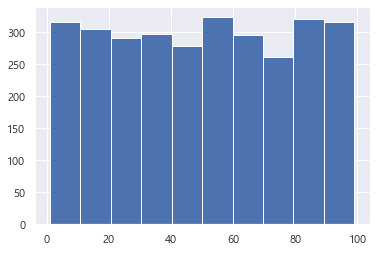

In [252]:
_=plt.hist(data)

49.933
28.7331604770516


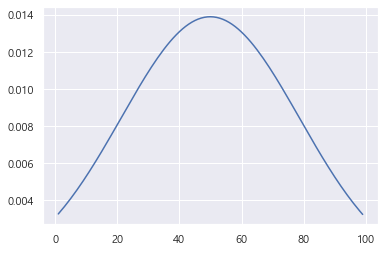

In [253]:
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

#확률밀도함수 생성
pdf = stats.norm.pdf(np.sort(data),data_mean,data_std)

_=plt.plot(np.sort(data),pdf)

4.1448326252672514e-18
0.9999999999999999


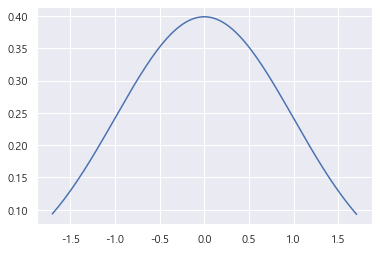

In [254]:
std_list = []
for i in data:
    z= (i - data_mean) /data_std
    std_list.append(z)

ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list),ol_data_mean, ol_data_std)

_=plt.plot(np.sort(std_list),ol_pdf)

50.121926910299
29.04742515120615


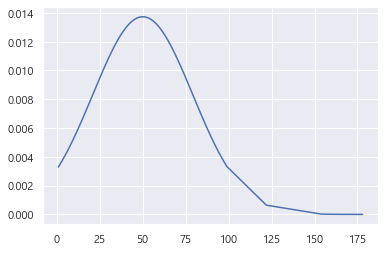

In [255]:
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0,len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2) #이상치 생성
    

    
ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),ol_data_mean, ol_data_std)

_=plt.plot(np.sort(ol_data),ol_pdf)


2.773713337269494e-17
1.0


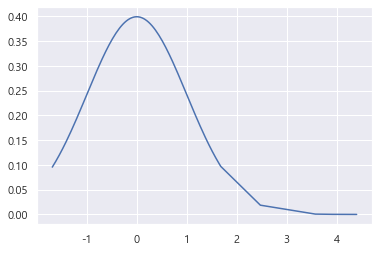

In [256]:
ol_std_list = []
for i in ol_data:
    z= (i - ol_data_mean) /ol_data_std
    ol_std_list.append(z)

ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean, ol_st_data_std)

_=plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [257]:
len(ol_std_list)

3010

In [258]:
for i in ol_std_list :
    z = i
    if z > 2:
        ol_std_list.remove(z)
    if z< -2:
        ol_std_list.remove(z)
        
len(ol_std_list)

3005

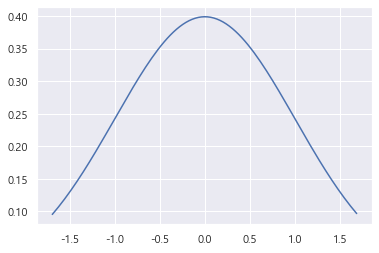

In [259]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),ol_st_data_mean, ol_st_data_std)

_=plt.plot(np.sort(ol_std_list),ol_std_pdf)

In [291]:
boxdata = pd.DataFrame(np.random.randn(100,3), columns = ["A열","B열","C열"])
boxdata.head()

,A열,B열,C열
0,0.605841,-1.870626,0.395188
1,1.393798,1.445047,-2.103477
2,-0.535752,-1.454846,-0.631490
3,-0.197302,1.302875,-3.051608
4,-0.210867,0.160598,0.105759


In [292]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,-0.055792,-0.066363,-0.117703
std,1.013888,0.978120,0.961885
min,-2.522824,-2.034810,-3.051608
25%,-0.728700,-0.716881,-0.649090
50%,-0.138471,-0.100627,-0.155535
75%,0.646243,0.523346,0.428943
max,2.281345,2.022730,3.855841


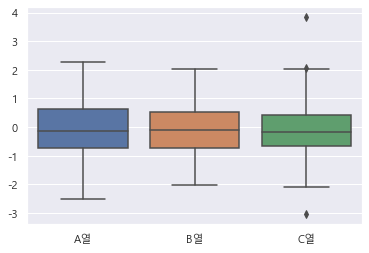

In [293]:
_=sns.boxplot(data=boxdata)

In [294]:
def get_outlier(df=None, column = None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR * weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column] < lowest) | (df[column]> highest)].index
    return outlier_idx

In [303]:
outlier_idx = get_outlier(df=boxdata, column='B열', weight = 1.5)

outlier_idx

boxdata.drop(outlier_idx, axis = 0, inplace = True)

boxdata.shape

(96, 3)

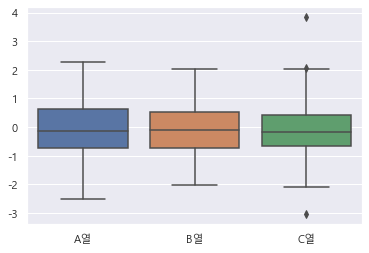

In [299]:
_=sns.boxplot(data= boxdata)

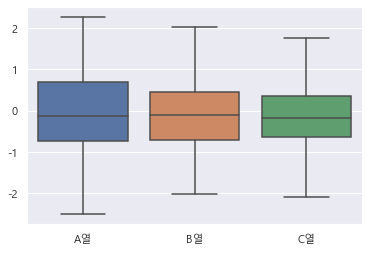

In [302]:
outlier_idx = get_outlier(df=boxdata, column='A열', weight = 1.5)

boxdata.drop(outlier_idx, axis = 0, inplace = True)
boxdata.shape

_=sns.boxplot(data=boxdata)

# 실습4

In [304]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'AppleGothic'

sns.set(font= font_family, rc = {"axes.unicode_minus" : False})


In [307]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.DESCR)
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [311]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
sy = pd.Series(iris.target, dtype="category")
sy = sy.cat.rename_categories(iris.target_names)

df['species']= sy

cols = iris.feature_names

df.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [312]:
from sklearn.feature_selection import VarianceThreshold

In [314]:
selector =VarianceThreshold()

selector.fit(df[cols])

print(selector.variances_)


[0.68112222 0.18871289 3.09550267 0.57713289]


In [318]:
selector.set_params(threshold = 0.6)
v_sel = selector.fit_transform(df[cols])

print(selector.variances_)

print(selector.get_support())

[0.68112222 0.18871289 3.09550267 0.57713289]
[ True False  True False]


In [325]:
iris_sel_df = df.iloc[:, [0,2]]
iris_sel_df.head()

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [326]:
iris_sel_df = pd.concat([iris_sel_df, df[['species']]],axis = 1)
iris_sel_df.head()

,sepal length (cm),petal length (cm),species
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


In [327]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [329]:
cor = df.corr()
cor

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


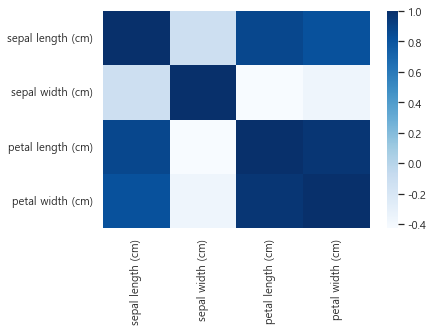

In [335]:
_=sns.heatmap(cor,annot=False,cmap = plt.cm.Blues)

In [338]:
cor_target = abs(cor['sepal length (cm)'])
print(cor_target)

sepal length (cm)    1.000000
sepal width (cm)     0.117570
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [339]:
cor_target[cor_target>0.6]

sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64

In [340]:
selected_cols = cor_target[cor_target>0.6]
print("상관관계 개수 > 0.6인 속성")
print(selected_cols)

상관관계 개수 > 0.6인 속성
sepal length (cm)    1.000000
petal length (cm)    0.871754
petal width (cm)     0.817941
Name: sepal length (cm), dtype: float64


In [341]:
selected_cols.index

Index(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'], dtype='object')

In [342]:
df[selected_cols.index].head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2


In [345]:
df_cor_sel = df[selected_cols.index]
df_cor_sel.head()

,sepal length (cm),petal length (cm),petal width (cm)
0,5.1,1.4,0.2
1,4.9,1.4,0.2
2,4.7,1.3,0.2
3,4.6,1.5,0.2
4,5.0,1.4,0.2
